<a href="https://colab.research.google.com/github/galenos-project/literature-mining/blob/main/Copy_of_LSR_DRAFT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pymed

## PubMed search for literature: Depression, Anxiety, Psychosis AND Psychadelics AND published between 2014-2024

In [ ]:
#PubMed Search string and results

from pymed import PubMed
import pandas as pd

pubmed = PubMed(tool="PubMedSearcher", email="avahomiar@gmail.com")

search_term = "(((mood) OR (depress*) OR (affective disorder)) OR ((psychosis) OR (schizo*) OR (psychotic))) AND ((psychedelic) OR (hallucinogen) OR (entheogen) OR (hallucinogenic) OR (psychotropic)) AND (2014/2024[Date - Publication])"
results = pubmed.query(search_term)
articleList = []
articleInfo = []

for article in results:
    articleDict = article.toDict()
    articleList.append(articleDict)

for article in articleList:
    pubmedId = article['pubmed_id'].partition('\n')[0]
    articleInfo.append({
        u'pubmed_id': pubmedId,
        u'title': article['title'],
        u'abstract': article['abstract'],})

    # keywords available
    if 'keywords' in article:
        articleInfo[-1]['keywords'] = article['keywords']

articlesPD = pd.DataFrame.from_dict(articleInfo)
export_csv = articlesPD.to_csv(r'C:\Users\ahomiar\OneDrive - Nexus365\Desktop\export_dataframe.csv', index=None, header=True)

print(articlesPD.head())


  pubmed_id                                              title  \
0  27793241  Seizure due to multiple drugs intoxication: a ...   
1  25529756  Efficacy of ranitidine in olanzapine-induced w...   
2  25148542  Characterization and evaluation of self-nanoem...   
3  27136907  Pharmacokinetic profile after multiple deltoid...   
4  26706484  Pregabalin Treatment of a Patient With Complex...   

                                            abstract  \
0  The mechanism of the antidepressant effect of ...   
1  Weight gain has long been recognized as a side...   
2  The purpose of this work was to develop self-n...   
3  Paliperidone palmitate (PP) is a once-monthly ...   
4  Complex regional pain syndrome (CRPS) is a pai...   

                                            keywords  
0  [Bupripion, Bupropiona, Convulsão, Intensive c...  
1              [olanzapine, ranitidine, weight gain]  
2  [Bioavailability enhancement, food effect, sel...  
3  [atypical long-acting injectable, deltoid a

##Using articles from search results to combine all sections

In [ ]:
for article in results:
    articleDict = article.toDict()

    # Combine title, abstract, and keywords into one text
    text = f"{articleDict['title']}\n{articleDict.get('abstract', '')}\n{' '.join(articleDict.get('keywords', []))}"

    articleDict['text'] = text
    articleList.append(articleDict)

articlesPD = pd.DataFrame.from_dict(articleList)
export_csv = articlesPD.to_csv(r'C:\Users\ahomiar\OneDrive - Nexus365\Desktop\export_dataframe.csv', index=None, header=True)

print(articlesPD)


                                            pubmed_id  \
0                                            27793241   
1                                            25529756   
2                                            25148542   
3                                            27136907   
4                                            26706484   
..                                                ...   
95  25628381\n17981266\n21123312\n21677641\n164699...   
96                                           25626189   
97                                           25624181   
98                                           25619678   
99                                           25619432   

                                                title  \
0   Seizure due to multiple drugs intoxication: a ...   
1   Efficacy of ranitidine in olanzapine-induced w...   
2   Characterization and evaluation of self-nanoem...   
3   Pharmacokinetic profile after multiple deltoid...   
4   Pregabalin Treatment of a 

##Combining all sections of all articles to create one text --> corpus

In [ ]:
search_term = "(((mood) OR (depress*) OR (affective disorder)) OR ((psychosis) OR (schizo*) OR (psychotic))) AND ((psychedelic) OR (hallucinogen) OR (entheogen) OR (hallucinogenic) OR (psychotropic)) AND (2014/2024[Date - Publication])"
results = pubmed.query(search_term)
articleList = []
articleInfo = []
corpus = ""

for article in results:
    articleDict = article.toDict()

    # Combine title, abstract, and keywords into one text
    text = f"{articleDict['title']}\n{articleDict.get('abstract', '')}\n{' '.join(articleDict.get('keywords', []))}"

    # Append text to corpus
    corpus += text + "\n"

    articleDict['text'] = text
    articleList.append(articleDict)

articlesPD = pd.DataFrame.from_dict(articleList)
export_csv = articlesPD.to_csv(r'C:\Users\ahomiar\OneDrive - Nexus365\Desktop\export_dataframe.csv', index=None, header=True)

print(corpus)


Seizure due to multiple drugs intoxication: a case report.
The mechanism of the antidepressant effect of bupropion is not fully understood. Besides, using it in the treatment of depression, it is found to be effective in reducing withdrawal symptoms due to smoking cessation. A 28-year-old female patient with a history of depression was admitted to emergency department an hour after ingestion of bupropion, quetiapine, and levothyroxine in high doses to commit suicide. While accepting her into the Intensive Care Unit, she was awake, alert, disoriented and agitated. After 2h, the patient had a generalized tonic-clonic seizure. The necessary treatment was given and 9h later with hemodynamic improvement, the patients' mental status improved. Bupropion may cause unusual behaviors such as delusions, paranoia, hallucinations, or confusion. The risk of seizure is strongly dose-dependent. We want to emphasize the importance of early gastric lavage and administration of activated charcoal.
Buprip

##Preprocessing the corpus and applying Latent Semantic Analysis (LSA)

In [ ]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

# Define preprocessing function
def preprocess_text(text):

# Implement preprocessing steps
  return text

# Preprocess the corpus
preprocessed_corpus = [preprocess_text(doc) for doc in corpus.split('\n')]

# Create TF-IDF matrix
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(preprocessed_corpus)

# Apply Singular Value Decomposition (SVD)
n_topics = 50  # Number of topics to extract
svd = TruncatedSVD(n_topics)
lsa = make_pipeline(svd, Normalizer(copy=False))
lsa_matrix = lsa.fit_transform(tfidf_matrix)

# Extract topics (words = 5)
terms = vectorizer.get_feature_names_out()
for i, topic in enumerate(svd.components_, start=1):
    top_terms = ", ".join([terms[index] for index in topic.argsort()[:-6:-1]])
    print(f"Topic {i}: {top_terms}")


Topic 1: treatment, depression, patients, antidepressant, schizophrenia
Topic 2: la, en, que, les, los
Topic 3: receptor, antidepressant, effects, effect, mice
Topic 4: schizophrenia, olanzapine, patients, dyskinesia, tardive
Topic 5: schizophrenia, response, disorder, major, depressive
Topic 6: olanzapine, depression, fluoxetine, bipolar, receptor
Topic 7: schizophrenia, resistant, self, treatment, paliperidone
Topic 8: tablets, magnesium, imipramine, fatigue, release
Topic 9: tablets, olanzapine, magnesium, imipramine, bipolar
Topic 10: affective, bipolar, disorder, staging, unipolar
Topic 11: self, efficacy, induced, disorder, los
Topic 12: receptor, psychotropic, tablets, los, sigma
Topic 13: self, receptor, sigma, disorder, stigma
Topic 14: les, des, et, psychotropic, une
Topic 15: antipsychotic, weight, sigma, drug, receptor
Topic 16: response, cognitive, effect, psychomotor, depression
Topic 17: response, affective, staging, illness, unipolar
Topic 18: depression, sigma, psychia

### LSA - each topic 10 words

In [ ]:
# Extract topics (words = 10)
terms = vectorizer.get_feature_names_out()
for i, topic in enumerate(svd.components_, start=1):
    top_terms = ", ".join([terms[index] for index in topic.argsort()[:-11:-1]])
    print(f"Topic {i}: {top_terms}")

Topic 1: treatment, depression, patients, antidepressant, schizophrenia, disorder, depressive, study, response, outcome
Topic 2: la, en, que, les, los, des, et, para, une, se
Topic 3: receptor, antidepressant, effects, effect, mice, test, modafinil, nmda, like, activity
Topic 4: schizophrenia, olanzapine, patients, dyskinesia, tardive, weight, study, fatigue, gain, ranitidine
Topic 5: schizophrenia, response, disorder, major, depressive, biomarkers, imaging, predict, paliperidone, palmitate
Topic 6: olanzapine, depression, fluoxetine, bipolar, receptor, combination, resistant, treatment, test, gain
Topic 7: schizophrenia, resistant, self, treatment, paliperidone, palmitate, depression, physicians, refractory, resident
Topic 8: tablets, magnesium, imipramine, fatigue, release, syndrome, substances, effect, duloxetine, pain
Topic 9: tablets, olanzapine, magnesium, imipramine, bipolar, release, substances, study, disorder, gain
Topic 10: affective, bipolar, disorder, staging, unipolar, il

###LSA - each topic 20 words

In [ ]:
# Extract topics (words = 20)
terms = vectorizer.get_feature_names_out()
for i, topic in enumerate(svd.components_, start=1):
    top_terms = ", ".join([terms[index] for index in topic.argsort()[:-21:-1]])
    print(f"Topic {i}: {top_terms}")




Topic 1: treatment, depression, patients, antidepressant, schizophrenia, disorder, depressive, study, response, outcome, self, resistant, predict, clinical, effects, bipolar, major, cognitive, effect, medication
Topic 2: la, en, que, les, los, des, et, para, une, se, le, el, pour, traitement, una, las, ou, dans, sont, au
Topic 3: receptor, antidepressant, effects, effect, mice, test, modafinil, nmda, like, activity, sigma, antagonist, glutamate, induced, study, receptors, dopaminergic, citalopram, trkb, involvement
Topic 4: schizophrenia, olanzapine, patients, dyskinesia, tardive, weight, study, fatigue, gain, ranitidine, efficacy, 20, treated, paliperidone, group, assess, chronic, follow, duloxetine, incidence
Topic 5: schizophrenia, response, disorder, major, depressive, biomarkers, imaging, predict, paliperidone, palmitate, predictors, magnetic, resonance, antipsychotic, receptor, antipsychotics, psychosis, outcome, remission, genetic
Topic 6: olanzapine, depression, fluoxetine, bip

##Preprocessing the text and applying Non-negative Matrix Factorization (NMF)

In [ ]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

# Define preprocessing function
def preprocess_text(text):
# Implement preprocessing steps
    return text

# Preprocess corpus
preprocessed_corpus = [preprocess_text(doc) for doc in corpus.split('\n')]

# Create TF-IDF matrix
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(preprocessed_corpus)

# Apply Non-negative Matrix Factorization (NMF)
n_topics = 50  # Number of topics to extract
nmf = NMF(n_components=n_topics, random_state=1)
nmf_matrix = nmf.fit_transform(tfidf_matrix)

# Extract topics
terms = vectorizer.get_feature_names_out()
for i, topic in enumerate(nmf.components_, start=1):
    top_terms = ", ".join([terms[index] for index in topic.argsort()[:-6:-1]])
    print(f"Topic {i}: {top_terms}")

Topic 1: treatment, depression, physicians, resident, resistant
Topic 2: la, los, en, que, para
Topic 3: nmda, citalopram, activity, fluoxetine, swim
Topic 4: dyskinesia, tardive, olanzapine, incidence, schizophrenia
Topic 5: disorder, major, biomarkers, depressive, treatment
Topic 6: bipolar, combination, fluoxetine, olanzapine, disorder
Topic 7: fatigue, duloxetine, syndrome, chronic, inventory
Topic 8: tablets, imipramine, magnesium, substances, release
Topic 9: gain, ranitidine, weight, olanzapine, 300
Topic 10: affective, staging, illness, unipolar, resistant
Topic 11: remission, patients, depressed, speed, mdd
Topic 12: psychotropic, children, adolescents, japan, 2002
Topic 13: stigma, self, anxiety, level, stigmatization
Topic 14: les, des, la, et, une
Topic 15: group, groups, significant, 05, waist
Topic 16: cognitive, deficits, depression, vortioxetine, pr
Topic 17: response, author, parikh, antipsychotics, predictors
Topic 18: days, follow, 30, subsequent, utilization
Topic 1

###NMF - each topic 10 words

In [ ]:
# Extract topics (words = 10)
terms = vectorizer.get_feature_names_out()
for i, topic in enumerate(svd.components_, start=1):
    top_terms = ", ".join([terms[index] for index in topic.argsort()[:-11:-1]])
    print(f"Topic {i}: {top_terms}")

Topic 1: treatment, depression, patients, antidepressant, schizophrenia, disorder, depressive, study, response, outcome
Topic 2: la, en, que, les, los, des, et, para, une, se
Topic 3: receptor, antidepressant, effects, effect, mice, test, modafinil, nmda, like, activity
Topic 4: schizophrenia, olanzapine, patients, dyskinesia, tardive, weight, study, fatigue, gain, ranitidine
Topic 5: schizophrenia, response, disorder, major, depressive, biomarkers, imaging, predict, paliperidone, palmitate
Topic 6: olanzapine, depression, fluoxetine, bipolar, receptor, combination, resistant, treatment, test, gain
Topic 7: schizophrenia, resistant, self, treatment, paliperidone, palmitate, depression, physicians, refractory, resident
Topic 8: tablets, magnesium, imipramine, fatigue, release, syndrome, substances, effect, duloxetine, pain
Topic 9: tablets, olanzapine, magnesium, imipramine, bipolar, release, substances, study, disorder, gain
Topic 10: affective, bipolar, disorder, staging, unipolar, il

###NMF - each topic 20 words

In [ ]:
# Extract topics
terms = vectorizer.get_feature_names_out()
for i, topic in enumerate(svd.components_, start=1):
    top_terms = ", ".join([terms[index] for index in topic.argsort()[:-21:-1]])
    print(f"Topic {i}: {top_terms}")

Topic 1: treatment, depression, patients, antidepressant, schizophrenia, disorder, depressive, study, response, outcome, self, resistant, predict, clinical, effects, bipolar, major, cognitive, effect, medication
Topic 2: la, en, que, les, los, des, et, para, une, se, le, el, pour, traitement, una, las, ou, dans, sont, au
Topic 3: receptor, antidepressant, effects, effect, mice, test, modafinil, nmda, like, activity, sigma, antagonist, glutamate, induced, study, receptors, dopaminergic, citalopram, trkb, involvement
Topic 4: schizophrenia, olanzapine, patients, dyskinesia, tardive, weight, study, fatigue, gain, ranitidine, efficacy, 20, treated, paliperidone, group, assess, chronic, follow, duloxetine, incidence
Topic 5: schizophrenia, response, disorder, major, depressive, biomarkers, imaging, predict, paliperidone, palmitate, predictors, magnetic, resonance, antipsychotic, receptor, antipsychotics, psychosis, outcome, remission, genetic
Topic 6: olanzapine, depression, fluoxetine, bip

##Preprocessing text and applying Latent Dirichlet Allocation (LDA)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Define preprocessing function
def preprocess_text(text):

    # Implement preprocessing steps
    return text

# Preprocess corpus
preprocessed_corpus = [preprocess_text(doc) for doc in corpus.split('\n')]

# Create CountVectorizer to convert text into a matrix of token counts
vectorizer = CountVectorizer(stop_words='english')
doc_term_matrix = vectorizer.fit_transform(preprocessed_corpus)

# Define number of topics
num_topics = 50

# Apply LDA
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(doc_term_matrix)

# Print topics generated by LDA model
terms = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    top_terms = ", ".join([terms[i] for i in topic.argsort()[:-6:-1]])
    print(f"Topic {topic_idx + 1}: {top_terms}")

Topic 1: antidepressant, social, canada, france, inequalities
Topic 2: non, baseline, significant, patients, responders
Topic 3: lps, effects, induced, behavior, depression
Topic 4: treatment, mri, used, clinical, alterations
Topic 5: 95, ci, use, antidepressants, pour
Topic 6: effects, patients, care, depression, collaborative
Topic 7: swn, 20, items, prototypical, depressive
Topic 8: major, tablets, episodes, caffeine, pourrait
Topic 9: tasks, depression, copying, neuropsychological, major
Topic 10: level, concentration, consciousness, effets, phenobarbital
Topic 11: treatment, antipsychotic, patient, medication, kyna
Topic 12: fatigue, syndrome, treatment, pain, duloxetine
Topic 13: release, sustained, snedds, ziprasidone, kg
Topic 14: groups, treatment, group, 05, 30
Topic 15: receptor, depression, effect, antagonist, test
Topic 16: la, que, los, una, se
Topic 17: psychomotor, controlled, trial, randomized, effects
Topic 18: depression, cognitive, participants, measures, effect
Top

###LDA - each topic with 10 words

In [ ]:
 # Extract topics (words = 10)
terms = vectorizer.get_feature_names_out()
for i, topic in enumerate(svd.components_, start=1):
    top_terms = ", ".join([terms[index] for index in topic.argsort()[:-11:-1]])
    print(f"Topic {i}: {top_terms}")


Topic 1: treatment, depression, patients, antidepressant, schizophrenia, disorder, depressive, study, response, outcome
Topic 2: la, en, que, les, los, des, et, para, une, se
Topic 3: receptor, antidepressant, effects, effect, mice, test, modafinil, nmda, like, activity
Topic 4: schizophrenia, olanzapine, patients, dyskinesia, tardive, weight, study, fatigue, gain, ranitidine
Topic 5: schizophrenia, response, disorder, major, depressive, biomarkers, imaging, predict, paliperidone, palmitate
Topic 6: olanzapine, depression, fluoxetine, bipolar, receptor, combination, resistant, treatment, test, gain
Topic 7: schizophrenia, resistant, self, treatment, paliperidone, palmitate, depression, physicians, refractory, resident
Topic 8: tablets, magnesium, imipramine, fatigue, release, syndrome, substances, effect, duloxetine, pain
Topic 9: tablets, olanzapine, magnesium, imipramine, bipolar, release, substances, study, disorder, gain
Topic 10: affective, bipolar, disorder, staging, unipolar, il

###LDA - each topic with 20 words

In [ ]:
# Extract topics
terms = vectorizer.get_feature_names_out()
for i, topic in enumerate(svd.components_, start=1):
    top_terms = ", ".join([terms[index] for index in topic.argsort()[:-21:-1]])
    print(f"Topic {i}: {top_terms}")

Topic 1: treatment, depression, patients, antidepressant, schizophrenia, disorder, depressive, study, response, outcome, self, resistant, predict, clinical, effects, bipolar, major, cognitive, effect, medication
Topic 2: la, en, que, les, los, des, et, para, une, se, le, el, pour, traitement, una, las, ou, dans, sont, au
Topic 3: receptor, antidepressant, effects, effect, mice, test, modafinil, nmda, like, activity, sigma, antagonist, glutamate, induced, study, receptors, dopaminergic, citalopram, trkb, involvement
Topic 4: schizophrenia, olanzapine, patients, dyskinesia, tardive, weight, study, fatigue, gain, ranitidine, efficacy, 20, treated, paliperidone, group, assess, chronic, follow, duloxetine, incidence
Topic 5: schizophrenia, response, disorder, major, depressive, biomarkers, imaging, predict, paliperidone, palmitate, predictors, magnetic, resonance, antipsychotic, receptor, antipsychotics, psychosis, outcome, remission, genetic
Topic 6: olanzapine, depression, fluoxetine, bip

##Preprocess the text and apply Semantic Signal Separation (with and without publication year filter)


In [ ]:
!pip install turftopic


In [ ]:
from turftopic import SemanticSignalSeparation

In [ ]:
# Define preprocessing function
def preprocess_text(text):
    # Implement preprocessing steps
    return text

# Collect articles
search_term = "(((mood) OR (depress*) OR (affective disorder)) OR ((psychosis) OR (schizo*) OR (psychotic))) AND ((psychedelic) OR (hallucinogen) OR (entheogen) OR (hallucinogenic) OR (psychotropic)) AND (2014/2024[Date - Publication])"
results = pubmed.query(search_term)
corpus = ""

# Collect article texts
for article in results:
    articleDict = article.toDict()

    # Combine title, abstract, and keywords into one text
    text = f"{articleDict['title']}\n{articleDict.get('abstract', '')}\n{' '.join(articleDict.get('keywords', []))}"

    # Append text to corpus
    corpus += text + "\n"

# Preprocess corpus
preprocessed_corpus = [preprocess_text(doc) for doc in corpus.split('\n')]

# Initialize and fit the SemanticSignalSeparation model
model = SemanticSignalSeparation(10, encoder="all-MiniLM-L12-v2")
model.fit(preprocessed_corpus)

# Print topics
model.print_topics()


Output()

[12:10:23] Documents encoded.                                                                          ]8;id=614014;file:///usr/local/lib/python3.10/dist-packages/turftopic/models/decomp.py\decomp.py]8;;\:]8;id=778667;file:///usr/local/lib/python3.10/dist-packages/turftopic/models/decomp.py#75\75]8;;\

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, 
whiten='unit-variance' will be used by default.
  warnings.warn(

           Decomposition done.                                                                         ]8;id=77283;file:///usr/local/lib/python3.10/dist-packages/turftopic/models/decomp.py\decomp.py]8;;\:]8;id=506384;file:///usr/local/lib/python3.10/dist-packages/turftopic/models/decomp.py#78\78]8;;\

           Term extraction done.                                                                       ]8;id=130099;file:///usr/local/lib/python3.10/dist-packages/turftopic/models/decomp.py\decomp.py]8;;\:]8;id=687424;file:///usr/local/lib/python3.10/dist-packages/turftopic/models/decomp.py#81\81]8;;\

[12:10:25] Vocabulary encoded.                                                                         ]8;id=428813;file:///usr/local/lib/python3.10/dist-packages/turftopic/models/decomp.py\decomp.py]8;;\:]8;id=471973;file:///usr/local/lib/python3.10/dist-packages/turftopic/models/decomp.py#84\84]8;;\

           Model fitting done.                                                                         ]8;id=819736;file:///usr/local/lib/python3.10/dist-packages/turftopic/models/decomp.py\decomp.py]8;;\:]8;id=663881;file:///usr/local/lib/python3.10/dist-packages/turftopic/models/decomp.py#88\88]8;;\

┏━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Topic ID ┃ Highest Ranking                                  ┃ Lowest Ranking                                    ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│        0 │ bipolar, mood, cognitive, psychiatric, symptoms  │ associated, weight, medications, care, research   │
├──────────┼──────────────────────────────────────────────────┼───────────────────────────────────────────────────┤
│        1 │ receptors, receptor, fluoxetine, antagonist,     │ studies, research, efficacy, depressive, outcomes │
│          │ aripiprazole                                     │                                                   │
├──────────┼──────────────────────────────────────────────────┼───────────────────────────────────────────────────┤
│        2 │ patients, illness, patient, clinical, treated    │ antipsychotics, receptors, mice, antipsychotic,   │
│          │                                                  │ brain                                             │
├──────────┼──────────────────────────────────────────────────┼───────────────────────────────────────────────────┤
│        3 │ patient, medications, therapeutic, anxiety,      │ 50, 10, 12, 20, years                             │
│          │ patients                                         │                                                   │
├──────────┼──────────────────────────────────────────────────┼───────────────────────────────────────────────────┤
│        4 │ syndrome, disease, findings, schizophrenia, mice │ antidepressant, antidepressants, depressed,       │
│          │                                                  │ depression, depressive                            │
├──────────┼──────────────────────────────────────────────────┼───────────────────────────────────────────────────┤
│        5 │ schizophrenia, brain, antipsychotic,             │ remission, weight, results, measures, outcome     │
│          │ psychotropic, psychiatric                        │                                                   │
├──────────┼──────────────────────────────────────────────────┼───────────────────────────────────────────────────┤
│        6 │ cognitive, brain, measures, scale, factors       │ antidepressants, antidepressant, medications,     │
│          │                                                  │ antipsychotics, olanzapine                        │
├──────────┼──────────────────────────────────────────────────┼───────────────────────────────────────────────────┤
│        7 │ age, 20, weight, higher, compared                │ treatment, treatments, treated, remission,        │
│          │                                                  │ therapeutic                                       │
├──────────┼──────────────────────────────────────────────────┼───────────────────────────────────────────────────┤
│        8 │ depressive, depressed, brain, depression,        │ antipsychotics, schizophrenia, olanzapine,        │
│          │ receptors                                        │ antipsychotic, medications                        │
├──────────┼──────────────────────────────────────────────────┼───────────────────────────────────────────────────┤
│        9 │ disorders, syndrome, disorder, disease, illness  │ efficacy, use, strategies, effective, using       │
└──────────┴──────────────────────────────────────────────────┴───────────────────────────────────────────────────┘

In [ ]:
# Define preprocessing function
def preprocess_text(text):
    # Implement preprocessing steps
    return text

# Collect articles
search_term = "(((mood) OR (depress*) OR (affective disorder)) OR ((psychosis) OR (schizo*) OR (psychotic))) AND ((psychedelic) OR (hallucinogen) OR (entheogen) OR (hallucinogenic) OR (psychotropic))"
results = pubmed.query(search_term)
corpus = ""

# Collect article texts
for article in results:
    articleDict = article.toDict()

    # Combine title, abstract, and keywords into one text
    text = f"{articleDict['title']}\n{articleDict.get('abstract', '')}\n{' '.join(articleDict.get('keywords', []))}"

    # Append text to the corpus
    corpus += text + "\n"

# Preprocess the corpus
preprocessed_corpus = [preprocess_text(doc) for doc in corpus.split('\n')]

# Initialize and fit the SemanticSignalSeparation model
model = SemanticSignalSeparation(10, encoder="all-MiniLM-L12-v2")
model.fit(preprocessed_corpus)

# Print topics
model.print_topics()



Output()

[12:11:29] Documents encoded.                                                                          ]8;id=660969;file:///usr/local/lib/python3.10/dist-packages/turftopic/models/decomp.py\decomp.py]8;;\:]8;id=774477;file:///usr/local/lib/python3.10/dist-packages/turftopic/models/decomp.py#75\75]8;;\

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, 
whiten='unit-variance' will be used by default.
  warnings.warn(

[12:11:30] Decomposition done.                                                                         ]8;id=644078;file:///usr/local/lib/python3.10/dist-packages/turftopic/models/decomp.py\decomp.py]8;;\:]8;id=486942;file:///usr/local/lib/python3.10/dist-packages/turftopic/models/decomp.py#78\78]8;;\

           Term extraction done.                                                                       ]8;id=21662;file:///usr/local/lib/python3.10/dist-packages/turftopic/models/decomp.py\decomp.py]8;;\:]8;id=190775;file:///usr/local/lib/python3.10/dist-packages/turftopic/models/decomp.py#81\81]8;;\

[12:11:32] Vocabulary encoded.                                                                         ]8;id=303657;file:///usr/local/lib/python3.10/dist-packages/turftopic/models/decomp.py\decomp.py]8;;\:]8;id=687473;file:///usr/local/lib/python3.10/dist-packages/turftopic/models/decomp.py#84\84]8;;\

           Model fitting done.                                                                         ]8;id=803252;file:///usr/local/lib/python3.10/dist-packages/turftopic/models/decomp.py\decomp.py]8;;\:]8;id=889279;file:///usr/local/lib/python3.10/dist-packages/turftopic/models/decomp.py#88\88]8;;\

┏━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Topic ID ┃ Highest Ranking                                  ┃ Lowest Ranking                                    ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│        0 │ findings, sleep, results, outcomes, prevalence   │ antidepressant, antidepressants, ketamine,        │
│          │                                                  │ esketamine, serotonin                             │
├──────────┼──────────────────────────────────────────────────┼───────────────────────────────────────────────────┤
│        1 │ long, time, present, understanding, life         │ prescribing, pharmacological, benzodiazepines,    │
│          │                                                  │ antipsychotics, clinicians                        │
├──────────┼──────────────────────────────────────────────────┼───────────────────────────────────────────────────┤
│        2 │ brain, depressive, cortex, depression, self      │ medications, prescribing, benzodiazepines,        │
│          │                                                  │ antipsychotics, clozapine                         │
├──────────┼──────────────────────────────────────────────────┼───────────────────────────────────────────────────┤
│        3 │ valproate, ketamine, esketamine, prescribing,    │ anxiety, psychosis, psychiatric, disorders,       │
│          │ sample                                           │ syndrome                                          │
├──────────┼──────────────────────────────────────────────────┼───────────────────────────────────────────────────┤
│        4 │ remission, treatment, therapy, therapeutic,      │ antidepressants, children, benzodiazepines,       │
│          │ treating                                         │ antidepressant, women                             │
├──────────┼──────────────────────────────────────────────────┼───────────────────────────────────────────────────┤
│        5 │ brain, schizophrenia, bipolar, psychiatric,      │ blood, valproate, women, inflammatory,            │
│          │ cortex                                           │ pharmacological                                   │
├──────────┼──────────────────────────────────────────────────┼───────────────────────────────────────────────────┤
│        6 │ psilocybin, dose, negative, results, positive    │ cortex, esketamine, ketamine, autism, brain       │
├──────────┼──────────────────────────────────────────────────┼───────────────────────────────────────────────────┤
│        7 │ benzodiazepines, sleep, antidepressants,         │ clinicians, health, studies, research, patients   │
│          │ antidepressant, serotonin                        │                                                   │
├──────────┼──────────────────────────────────────────────────┼───────────────────────────────────────────────────┤
│        8 │ depressive, depression, therapy, antidepressant, │ schizophrenia, antipsychotics, psilocybin,        │
│          │ interventions                                    │ psychosis, antipsychotic                          │
├──────────┼──────────────────────────────────────────────────┼───────────────────────────────────────────────────┤
│        9 │ psychedelic, psychedelics, ayahuasca, lsd, drug  │ remission, inflammatory, bipolar, treated,        │
│          │                                                  │ severity                                          │
└──────────┴──────────────────────────────────────────────────┴───────────────────────────────────────────────────┘

In [ ]:
from turftopic import KeyNMF
model = KeyNMF(10).fit(preprocessed_corpus)
model.print_topics()

Output()

[12:12:11] Documents encoded.                                                                         ]8;id=27486;file:///usr/local/lib/python3.10/dist-packages/turftopic/models/keynmf.py\keynmf.py]8;;\:]8;id=480446;file:///usr/local/lib/python3.10/dist-packages/turftopic/models/keynmf.py#270\270]8;;\

[12:12:13] Keyword extraction done.                                                                   ]8;id=359642;file:///usr/local/lib/python3.10/dist-packages/turftopic/models/keynmf.py\keynmf.py]8;;\:]8;id=782502;file:///usr/local/lib/python3.10/dist-packages/turftopic/models/keynmf.py#276\276]8;;\

           Model fitting done.                                                                        ]8;id=161063;file:///usr/local/lib/python3.10/dist-packages/turftopic/models/keynmf.py\keynmf.py]8;;\:]8;id=240132;file:///usr/local/lib/python3.10/dist-packages/turftopic/models/keynmf.py#288\288]8;;\

┏━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Topic ID ┃ Highest Ranking                                                                                      ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│        0 │ depression, anxiety, benzodiazepines, antidepressants, serotonin, effects, brain, disorders, drugs,  │
│          │ remission                                                                                            │
├──────────┼──────────────────────────────────────────────────────────────────────────────────────────────────────┤
│        1 │ psychotropic, psychiatric, medication, prescribing, disorders, medications, mental, patients, drugs, │
│          │ health                                                                                               │
├──────────┼──────────────────────────────────────────────────────────────────────────────────────────────────────┤
│        2 │ antidepressant, antidepressants, medications, effects, receptor, mood, therapy, efficacy, stress,    │
│          │ effect                                                                                               │
├──────────┼──────────────────────────────────────────────────────────────────────────────────────────────────────┤
│        3 │ psychedelic, therapy, clinicians, lsd, ayahuasca, dmt, serotonin, ketamine, primary, drug            │
├──────────┼──────────────────────────────────────────────────────────────────────────────────────────────────────┤
│        4 │ schizophrenia, antipsychotic, clozapine, patients, medication, patient, drug, bipolar, receptor,     │
│          │ dose                                                                                                 │
├──────────┼──────────────────────────────────────────────────────────────────────────────────────────────────────┤
│        5 │ antipsychotics, antidepressants, bipolar, medication, autism, disorder, efficacy, adverse,           │
│          │ disorders, valproate                                                                                 │
├──────────┼──────────────────────────────────────────────────────────────────────────────────────────────────────┤
│        6 │ psilocybin, psychedelics, effects, lsd, disorders, therapeutic, trials, adverse, ayahuasca, drug     │
├──────────┼──────────────────────────────────────────────────────────────────────────────────────────────────────┤
│        7 │ depressive, ketamine, disorder, bipolar, esketamine, drug, antidepressants, depression,              │
│          │ pharmacological, clinical                                                                            │
├──────────┼──────────────────────────────────────────────────────────────────────────────────────────────────────┤
│        8 │ treatment, patients, symptoms, therapy, clinical, treatments, health, study, patient, findings       │
├──────────┼──────────────────────────────────────────────────────────────────────────────────────────────────────┤
│        9 │ psychosis, systematic, intervention, effects, onset, interventions, antipsychotic, findings,         │
│          │ therapeutic, research                                                                                │
└──────────┴──────────────────────────────────────────────────────────────────────────────────────────────────────┘

In [ ]:
from turftopic import KeyNMF
model = KeyNMF(20).fit(preprocessed_corpus)
model.print_topics()

Output()

[12:12:51] Documents encoded.                                                                         ]8;id=883233;file:///usr/local/lib/python3.10/dist-packages/turftopic/models/keynmf.py\keynmf.py]8;;\:]8;id=246059;file:///usr/local/lib/python3.10/dist-packages/turftopic/models/keynmf.py#270\270]8;;\

[12:12:52] Keyword extraction done.                                                                   ]8;id=156684;file:///usr/local/lib/python3.10/dist-packages/turftopic/models/keynmf.py\keynmf.py]8;;\:]8;id=315503;file:///usr/local/lib/python3.10/dist-packages/turftopic/models/keynmf.py#276\276]8;;\

           Model fitting done.                                                                        ]8;id=318705;file:///usr/local/lib/python3.10/dist-packages/turftopic/models/keynmf.py\keynmf.py]8;;\:]8;id=515789;file:///usr/local/lib/python3.10/dist-packages/turftopic/models/keynmf.py#288\288]8;;\

┏━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Topic ID ┃ Highest Ranking                                                                                      ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│        0 │ depression, anxiety, serotonin, disorders, brain, effects, remission, prescribing, mental, receptor  │
├──────────┼──────────────────────────────────────────────────────────────────────────────────────────────────────┤
│        1 │ psychotropic, medication, prescribing, mental, medications, drugs, children, disorders, health,      │
│          │ schizophrenia                                                                                        │
├──────────┼──────────────────────────────────────────────────────────────────────────────────────────────────────┤
│        2 │ antidepressant, medications, effects, receptor, mood, effect, stress, therapy, significant, efficacy │
├──────────┼──────────────────────────────────────────────────────────────────────────────────────────────────────┤
│        3 │ psychedelic, therapy, clinicians, serotonin, primary, drugs, participants, pharmacological, health,  │
│          │ self                                                                                                 │
├──────────┼──────────────────────────────────────────────────────────────────────────────────────────────────────┤
│        4 │ psilocybin, effects, therapeutic, adverse, drug, trials, serotonin, clinical, dose, efficacy         │
├──────────┼──────────────────────────────────────────────────────────────────────────────────────────────────────┤
│        5 │ antipsychotics, disorders, autism, disorder, adverse, onset, medication, approach, patients,         │
│          │ efficacy                                                                                             │
├──────────┼──────────────────────────────────────────────────────────────────────────────────────────────────────┤
│        6 │ psychedelics, disorders, effects, drugs, pharmacological, mental, cognitive, self, efficacy, safety  │
├──────────┼──────────────────────────────────────────────────────────────────────────────────────────────────────┤
│        7 │ depressive, disorder, mdd, stress, pharmacological, cortex, major, disorders, symptoms, study        │
├──────────┼──────────────────────────────────────────────────────────────────────────────────────────────────────┤
│        8 │ treatment, therapy, treatments, symptoms, resistant, interventions, findings, pharmacological, dose, │
│          │ effect                                                                                               │
├──────────┼──────────────────────────────────────────────────────────────────────────────────────────────────────┤
│        9 │ psychosis, systematic, intervention, effects, onset, interventions, findings, research, evidence,    │
│          │ therapeutic                                                                                          │
├──────────┼──────────────────────────────────────────────────────────────────────────────────────────────────────┤
│       10 │ ketamine, esketamine, drug, therapeutic, effects, depression, clinical, trials, medications,         │
│          │ pharmacological                                                                                      │
├──────────┼──────────────────────────────────────────────────────────────────────────────────────────────────────┤
│       11 │ antipsychotic, medication, schizophrenia, dose, patient, cortex, drug, patients, effects, emotional  │
├──────────┼──────────────────────────────────────────────────────────────────────────────────────────────────────┤
│       12 │ schizophrenia, clozapine, receptor, brain, resistant, self, anti, substance, findings, drug          │
├──────────┼────────────────────────────────────────────

##test visualization

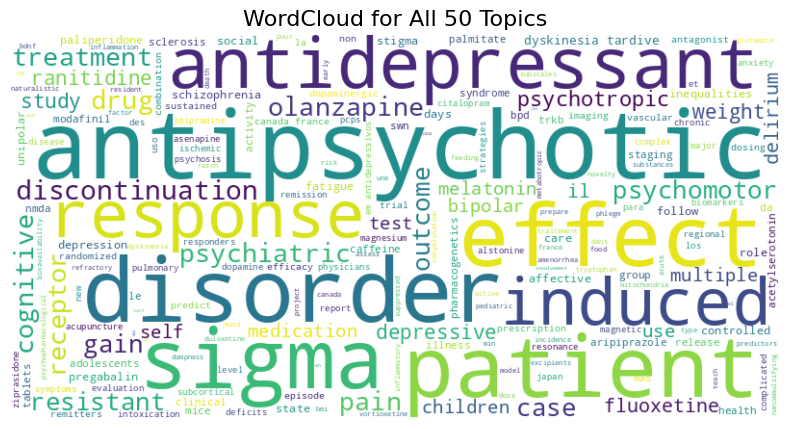

In [ ]:
# Extract topics (words = 20)
terms = vectorizer.get_feature_names_out()
for i, topic in enumerate(svd.components_, start=1):
    top_terms = ", ".join([terms[index] for index in topic.argsort()[:-21:-1]])

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Initialize an empty string to store combined top terms
combined_corpus = ""

# Extract topics (words = 20)
terms = vectorizer.get_feature_names_out()
for i, topic in enumerate(svd.components_, start=1):
    # Collect top terms for the current topic
    top_terms = ", ".join([terms[index] for index in topic.argsort()[:-21:-1]])

    # Append top terms to the combined corpus
    combined_corpus += top_terms + " "

# Generate WordCloud from the combined corpus
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_corpus)

# Display the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('WordCloud for All 50 Topics', fontsize=16)
plt.axis('off')
plt.show()


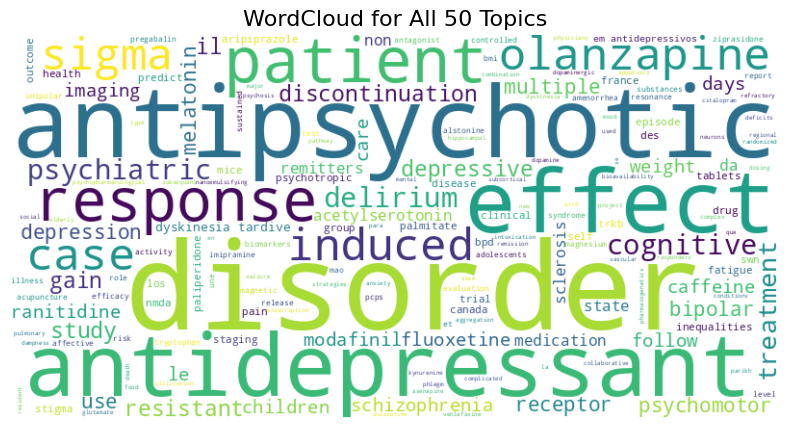

In [ ]:
# Extract topics (words = 10)
terms = vectorizer.get_feature_names_out()
for i, topic in enumerate(svd.components_, start=1):
    top_terms = ", ".join([terms[index] for index in topic.argsort()[:-11:-1]])

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Initialize an empty string to store combined top terms
combined_corpus = ""

# Extract topics (words = 10)
terms = vectorizer.get_feature_names_out()
for i, topic in enumerate(svd.components_, start=1):
    # Collect top terms for the current topic
    top_terms = ", ".join([terms[index] for index in topic.argsort()[:-11:-1]])

    # Append top terms to the combined corpus
    combined_corpus += top_terms + " "

# Generate WordCloud from the combined corpus
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_corpus)

# Display the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('WordCloud for All 50 Topics', fontsize=16)
plt.axis('off')
plt.show()


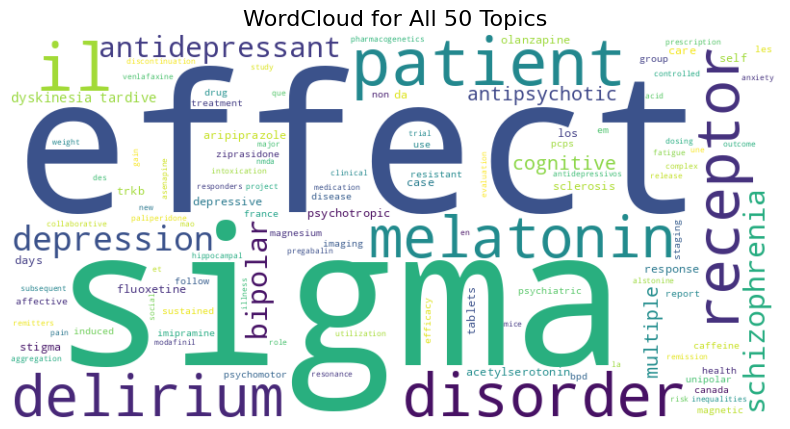

In [ ]:
# Extract topics (words = 5)
terms = vectorizer.get_feature_names_out()
for i, topic in enumerate(svd.components_, start=1):
    top_terms = ", ".join([terms[index] for index in topic.argsort()[:-6:-1]])

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Initialize an empty string to store combined top terms
combined_corpus = ""

# Extract topics (words = 10)
terms = vectorizer.get_feature_names_out()
for i, topic in enumerate(svd.components_, start=1):
    # Collect top terms for the current topic
    top_terms = ", ".join([terms[index] for index in topic.argsort()[:-6:-1]])

    # Append top terms to the combined corpus
    combined_corpus += top_terms + " "

# Generate WordCloud from the combined corpus
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_corpus)

# Display the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('WordCloud for All 50 Topics', fontsize=16)
plt.axis('off')
plt.show()


Output()

[12:13:24] Documents encoded.                                                                          ]8;id=727702;file:///usr/local/lib/python3.10/dist-packages/turftopic/models/decomp.py\decomp.py]8;;\:]8;id=978272;file:///usr/local/lib/python3.10/dist-packages/turftopic/models/decomp.py#75\75]8;;\

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, 
whiten='unit-variance' will be used by default.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:123: ConvergenceWarning: FastICA did not 
converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(

           Decomposition done.                                                                         ]8;id=327741;file:///usr/local/lib/python3.10/dist-packages/turftopic/models/decomp.py\decomp.py]8;;\:]8;id=106955;file:///usr/local/lib/python3.10/dist-packages/turftopic/models/decomp.py#78\78]8;;\

           Term extraction done.                                                                       ]8;id=464098;file:///usr/local/lib/python3.10/dist-packages/turftopic/models/decomp.py\decomp.py]8;;\:]8;id=980214;file:///usr/local/lib/python3.10/dist-packages/turftopic/models/decomp.py#81\81]8;;\

[12:13:25] Vocabulary encoded.                                                                         ]8;id=38257;file:///usr/local/lib/python3.10/dist-packages/turftopic/models/decomp.py\decomp.py]8;;\:]8;id=438605;file:///usr/local/lib/python3.10/dist-packages/turftopic/models/decomp.py#84\84]8;;\

           Model fitting done.                                                                         ]8;id=839485;file:///usr/local/lib/python3.10/dist-packages/turftopic/models/decomp.py\decomp.py]8;;\:]8;id=798837;file:///usr/local/lib/python3.10/dist-packages/turftopic/models/decomp.py#88\88]8;;\

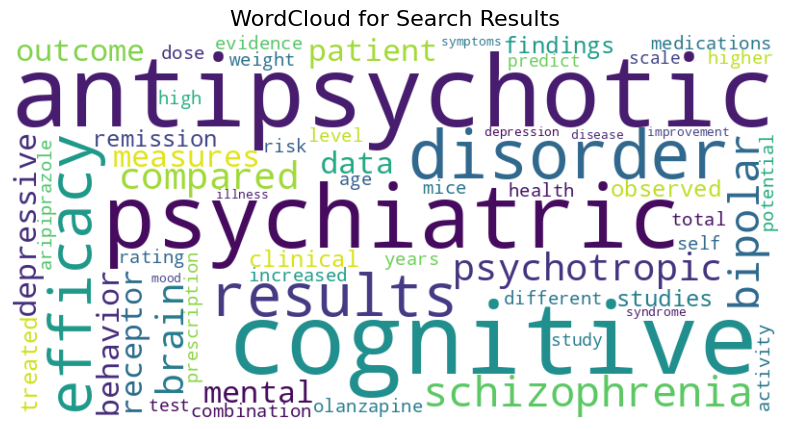

In [ ]:
# Define preprocessing function
def preprocess_text(text):
    # Implement preprocessing steps
    return text

# Collect articles
search_term = "(((mood) OR (depress*) OR (affective disorder)) OR ((psychosis) OR (schizo*) OR (psychotic))) AND ((psychedelic) OR (hallucinogen) OR (entheogen) OR (hallucinogenic) OR (psychotropic)) AND (2014/2024[Date - Publication])"
results = pubmed.query(search_term)
corpus = ""

# Collect article texts
for article in results:
    articleDict = article.toDict()

    # Combine title, abstract, and keywords into one text
    text = f"{articleDict['title']}\n{articleDict.get('abstract', '')}\n{' '.join(articleDict.get('keywords', []))}"

    # Append text to corpus
    corpus += text + "\n"

# Preprocess corpus
preprocessed_corpus = [preprocess_text(doc) for doc in corpus.split('\n')]

# Initialize and fit the SemanticSignalSeparation model
model = SemanticSignalSeparation(10, encoder="all-MiniLM-L12-v2")
model.fit(preprocessed_corpus)

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Initialize an empty string to store combined top terms
combined_corpus = ""

# Extract topics (words = 10)
terms = model.vectorizer.get_feature_names_out()
for i, topic in enumerate(model.components_, start=1):
    # Collect top terms for the current topic
    top_terms = ", ".join([terms[index] for index in topic.argsort()[:-11:-1]])

    # Append top terms to the combined corpus
    combined_corpus += top_terms + " "

# Generate WordCloud from the combined corpus
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_corpus)

# Display the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('WordCloud for Search Results', fontsize=16)
plt.axis('off')
plt.show()


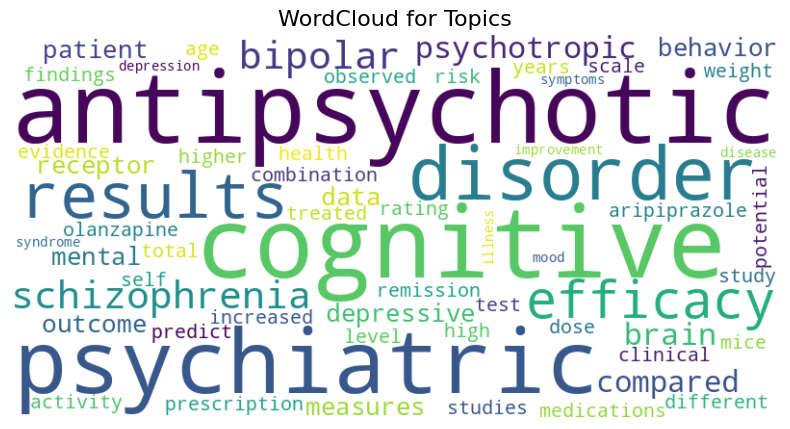

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Initialize an empty list to store top terms for each topic
top_terms_list = []

# Extract topics (words = 10)
topics = model.components_
num_top_words = 10
for i, topic in enumerate(topics):
    # Sort the topic and get the top terms
    top_indices = topic.argsort()[:-num_top_words-1:-1]
    top_terms = [terms[index] for index in top_indices]

    # Append top terms to the list
    top_terms_list.append(top_terms)

# Concatenate all top terms for each topic ID
combined_corpus = ' '.join([', '.join(top_terms) for top_terms in top_terms_list])

# Generate WordCloud from the combined corpus
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_corpus)

# Display the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('WordCloud for Topics', fontsize=16)
plt.axis('off')
plt.show()
